In [2]:
## importing the required libraries 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Reading the dataset (sincce data is csv format so use read_csv from the pandas library)

In [5]:
data = pd.read_csv("D:\\Railway Dataset\\MetroPT3(AirCompressor).csv") 

In [6]:
data.head() ## shows the first five rows of the dataset

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [7]:
## from data.info() we got to know that except timestamp all are numerical columns
## and timestamp is the object but it needs to be the datetime column so we need to convert that to datetime 
## there are total 1516948 columns are there 

In [8]:
data.info() ## for getting inforamtion about the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

In [9]:
## for converting object column to datetime column (timestamp column)

In [10]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [11]:
## for checking the null values 

In [12]:
data.isnull().sum() ## from this we came to know that there are no null values present in the dataset

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

In [13]:
## for checking wether duplicate values present in the dataset or not

In [14]:
data.duplicated().sum() 

0

In [15]:
## so no duplicates present in it from the abpve input

In [16]:
## so for getting breif information about the dataset use describe method from the dataset

In [17]:
data.describe()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1516948,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,2020-05-16 22:58:36.631517184,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
min,0.000000e+00,2020-02-01 00:00:00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,2020-03-23 05:05:04.500000,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,2020-05-17 08:07:06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,2020-07-10 03:07:27.500000,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,2020-09-01 03:59:50,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,4.379053e+06,NaN,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01


In [18]:
## from the above description if we try to plot the boxplot we came to know that wether Outliers present in the dataset or not 

In [19]:
## from the above boxplot we came to know that lot of outliers present in the 'TP2' columns of the dataset
## if we remove those outliers we can lose the lot of data so try to do some transformations on the data

In [20]:
## 'TP3' column also contains so many outliers 

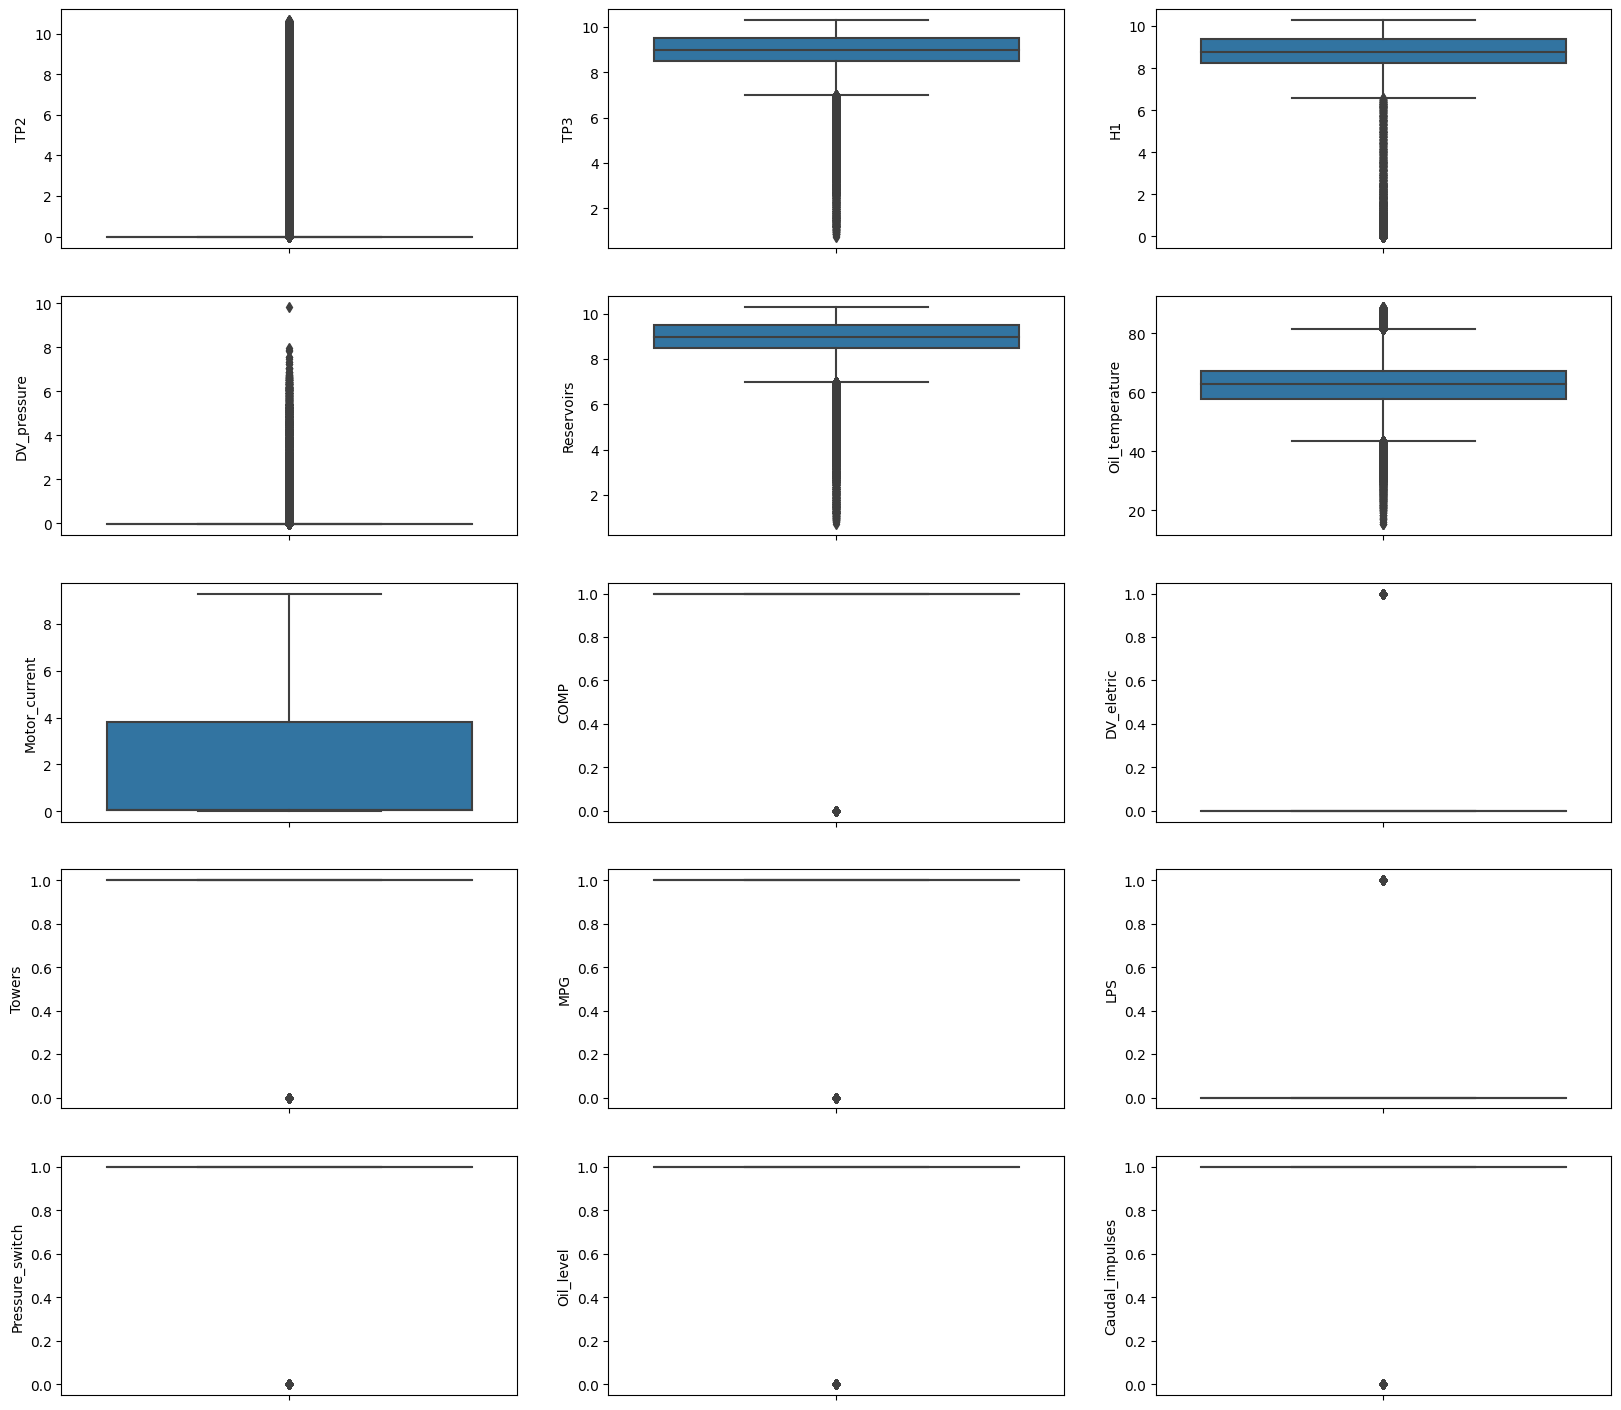

In [21]:
plt.figure(figsize=(20,18))
plt.subplot(5,3,1)
sns.boxplot(data= data , y = 'TP2' )
plt.subplot(5,3,2)
sns.boxplot(data=data , y = 'TP3')
plt.subplot(5,3,3)
sns.boxplot(data= data , y = 'H1')
plt.subplot(5,3,4)
sns.boxplot(data=data , y = 'DV_pressure')
plt.subplot(5,3,5)
sns.boxplot(data=data ,y='Reservoirs')
plt.subplot(5,3,6)
sns.boxplot(data=data , y='Oil_temperature')
plt.subplot(5,3,7)
sns.boxplot(data=data , y='Motor_current')
plt.subplot(5,3,8)
sns.boxplot(data=data,y='COMP')
plt.subplot(5,3,9)
sns.boxplot(data=data , y = 'DV_eletric')
plt.subplot(5,3,10)
sns.boxplot(data=data , y='Towers')
plt.subplot(5,3,11)
sns.boxplot(data = data , y='MPG')
plt.subplot(5,3,12)
sns.boxplot(data=data,y='LPS')
plt.subplot(5,3,13)
sns.boxplot(data=data , y='Pressure_switch')
plt.subplot(5,3,14)
sns.boxplot(data=data , y='Oil_level')
plt.subplot(5,3,15)
sns.boxplot(data=data , y = 'Caudal_impulses')
plt.show()

In [22]:
## from the above boxplots we came to know that the motor current is the only column that dosent contain any outliers 
## All the columns before Motor_current column contains lot of outliers and the column after the Motor_current contains very few outliers

## Labeling the Data Set

since the given dataset is unlabelled dataset for any type of prediction we need to label the dataset first . so for labelling the dataset we need some information and this information is the failure information given in the description of the data .

there are total 4 failures accored and the failure information of the four failure events is given below

failure1 : it is occured between 18/04/2020 0:00 and ended at 18/04/2020 23:59 during this duration all the datapoints are in the failure condition only

failure2 : it is occured between 29/05/2020 23:30 and ended at 30/05/2020 6:00 during this duration all the datapoints are in the failure condition only

failure3 : it is occured between 05/06/2020 10:00 and ended at 07/06/2020 14:30 during this duration all the datapoints are in the failure condition only

failure4 : it is occured between 15/07/2020 14:30 and ended at 15/07/2020 19:00 during this duration all the datapoints are in the failure condition only

In [23]:
failure1_dates = "2020-04-18 0:00 to 2020-04-18 23:59"
failure2_dates = "2020-05-29 23:30 to 2020-05-30 6:00"
failure3_dates = "2020-06-05 10:00 to 2020-06-07 14:30"
failure4_dates = "2020-07-15 14:30 to 2020-07-15 19:00"

In [24]:
## for extracting the first failure points , we need to extract from given dataset with following condition
## first split the failure1_dates using split('to') function for getting start and end datetime and convert that string to the datetime using pd.to_datetime and then compare
condition1 = (data['timestamp'] >= pd.to_datetime(failure1_dates.split('to')[0])) & (data['timestamp'] <= pd.to_datetime(failure1_dates.split('to')[1]))

In [25]:
# similarly for all failure points 
condition2 = (data['timestamp'] >= pd.to_datetime(failure2_dates.split('to')[0])) & (data['timestamp'] <= pd.to_datetime(failure2_dates.split('to')[1]))
condition3 = (data['timestamp'] >= pd.to_datetime(failure3_dates.split('to')[0])) & (data['timestamp'] <= pd.to_datetime(failure3_dates.split('to')[1]))
condition4 = (data['timestamp'] >= pd.to_datetime(failure4_dates.split('to')[0])) & (data['timestamp'] <= pd.to_datetime(failure4_dates.split('to')[1]))

In [26]:
## so for extracting all the data points between these conditions we need to take all the points so use bitwise or operation

condition = (condition1 | condition2 | condition3 | condition4)

In [27]:
## for extracting failure points between each failure use boolean indexing
failure1_data = data[condition1]
failure2_data = data[condition2]
failure3_data = data[condition3]
failure4_data = data[condition4]

In [28]:
## use the boolean indexing for extracting all the data points from the dataset
failure_datapoints = data[condition]

In [29]:
## Label the dataset with failure and non failure

Labeling the Dataset:
- For failure data points: Label them as 1.
- For non-failure data points: Label them as 0.

In [30]:
## we know the condition where the points are failure so use numpy to labele
failure_info = np.where(condition==True,1,0)
## condition==True represents it as failure so it assaign 1 value to it otherwise it assaigns 0 for that condition

In [31]:
## Finally add the labelling to the dataset

In [32]:
data['Failure'] = failure_info

In [33]:
print(data.columns)

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses', 'Failure'],
      dtype='object')


In [34]:
## so from here we got Failure column
## Labeling of the dataset Completed

## Data Preprocesssing

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [36]:
## Dividing the data for training and Testing and we are allocating 60 % of the data for training and 40% of the data fpr testing

In [37]:
x_train , x_test , y_train , y_test = train_test_split(data.iloc[:,2:17],data.iloc[:,-1] , train_size=0.6 , random_state=42)

In [38]:
print(failure_datapoints.shape)
print(data.shape)

(29954, 17)
(1516948, 18)


In [39]:
failure_data_ponts_percentage = (failure_datapoints.shape[0]/data.shape[0])*100
print(failure_data_ponts_percentage)

1.974622729322297


In [40]:
## from above we came to conclusion that only very few number of data points are failure i.e 1.9746 percentage of data points are present
## This is highly imbalanced dataset so we need to balance it 
## if we will try to downsample the dataset then we will lose around 1456000 data points which is nearly 96% of the data which is not a good method
## So upsample the dataset

In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter

# Original class distribution
print("Before RSMOTE:", Counter(y_train))

# Apply RSMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Apply Tomek Links to remove potential overlapping samples
tomek = TomekLinks()
X_train_rsmote, y_train_rsmote = tomek.fit_resample(X_train_smote, y_train_smote)

# New class distribution after RSMOTE
print("After RSMOTE:", Counter(y_train_rsmote))
# SMOTE object will give error if we will pass the datetime object so dont pass it 

Before RSMOTE: Counter({0: 892336, 1: 17832})
After RSMOTE: Counter({0: 892336, 1: 892294})


In [42]:
print(f"Total Data Points in the training array is {Counter(y_train)}")
print(f"Total Non-Failure and Failure Points in the Resampled training array is {Counter(y_train_rsmote)}")

Total Data Points in the training array is Counter({0: 892336, 1: 17832})
Total Non-Failure and Failure Points in the Resampled training array is Counter({0: 892336, 1: 892294})


In [43]:
## So now the training dataset is a balanced dataset 

###### Apllying Standard Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaling_pipeline = Pipeline(
steps=[
    ('Sacle the dataset' , StandardScaler())
])

In [46]:
x_train = scaling_pipeline.fit_transform(X_train_rsmote)

In [47]:
x_test = scaling_pipeline.transform(x_test)

In [48]:
## Now performing some operations to remove the outliers and before that try to draw KDE plot to check the distribution of the data

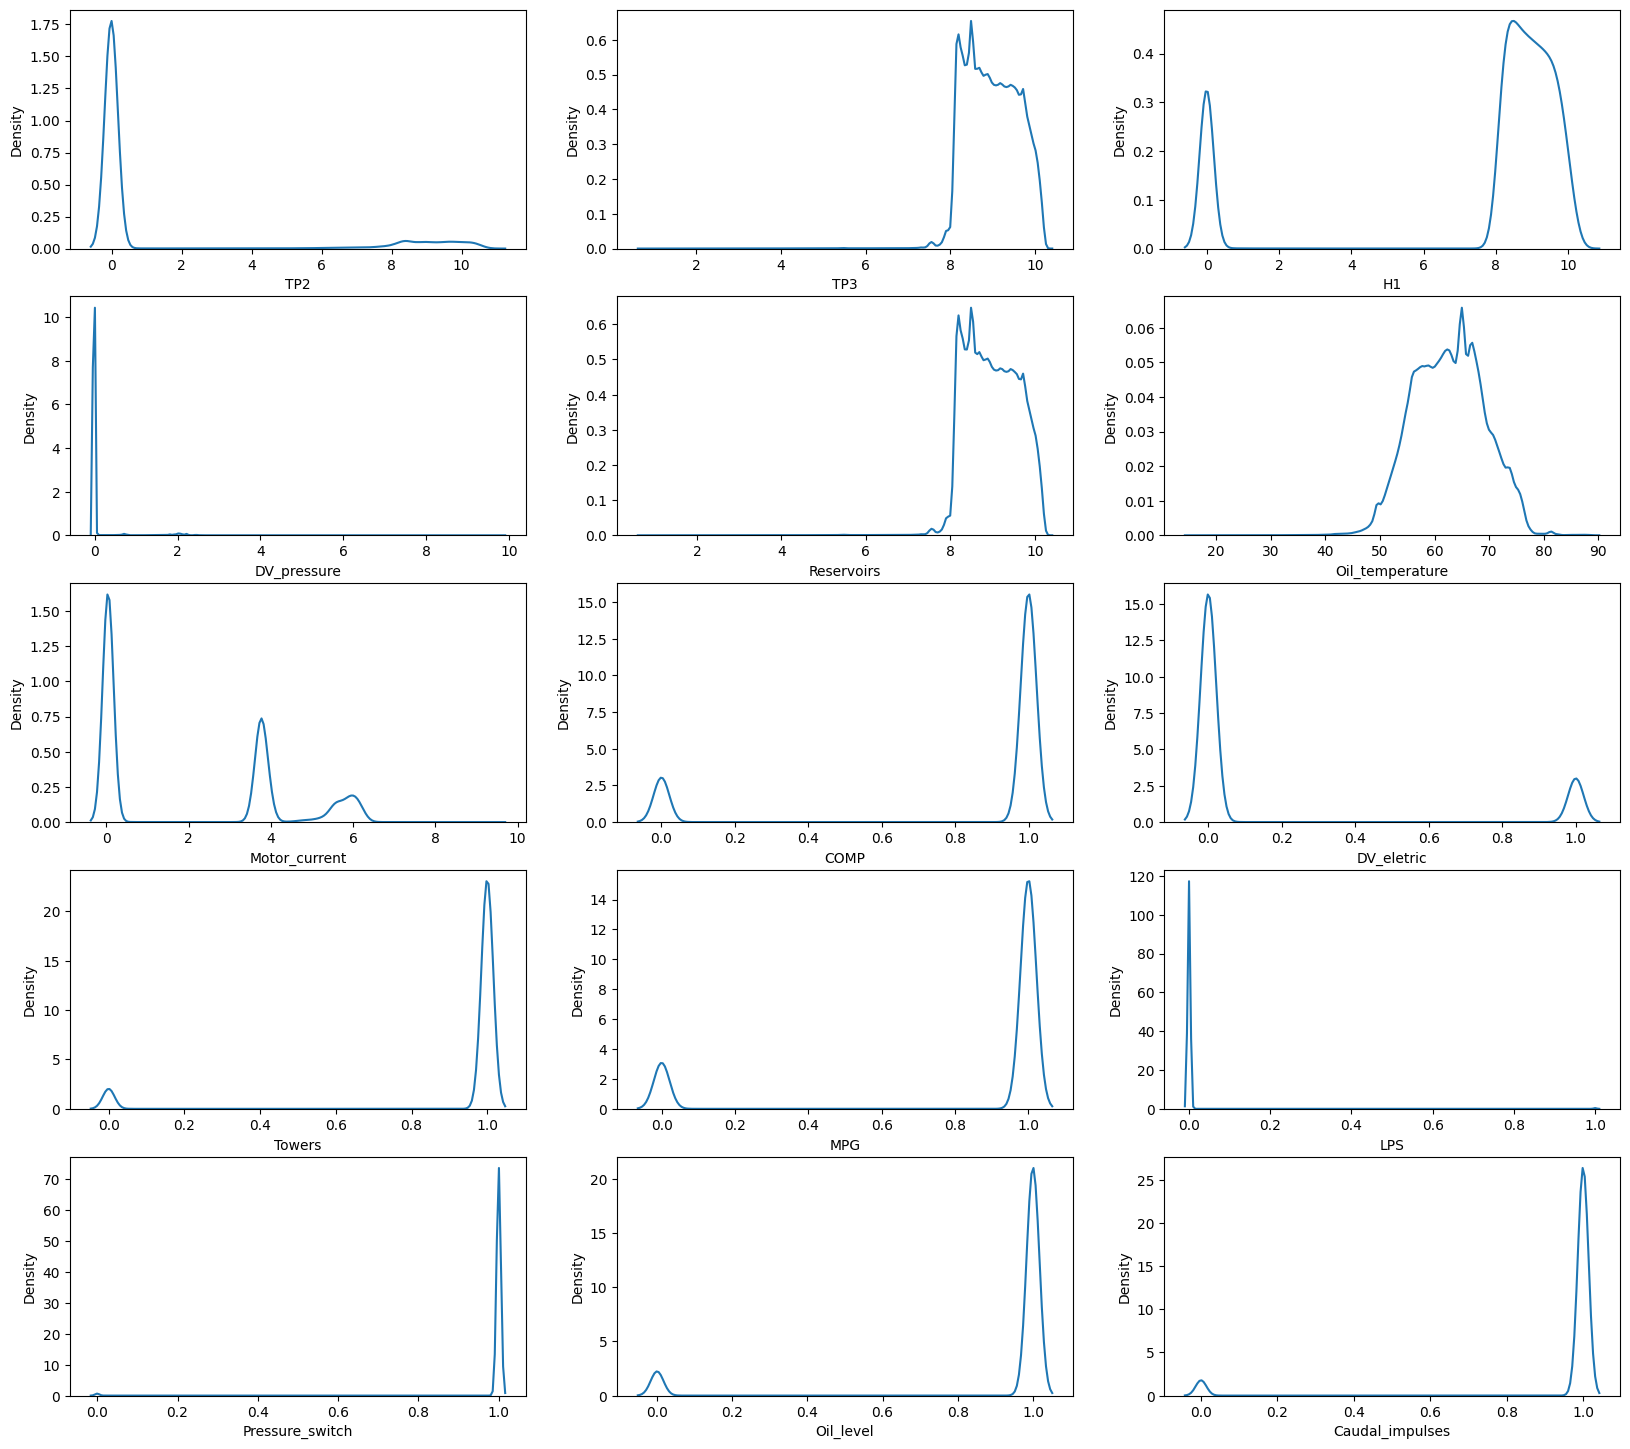

In [49]:
plt.figure(figsize=(20,18))
plt.subplot(5,3,1)
sns.kdeplot(data= data , x = 'TP2' )
plt.subplot(5,3,2)
sns.kdeplot(data=data , x = 'TP3')
plt.subplot(5,3,3)
sns.kdeplot(data= data , x = 'H1')
plt.subplot(5,3,4)
sns.kdeplot(data=data , x = 'DV_pressure')
plt.subplot(5,3,5)
sns.kdeplot(data=data ,x='Reservoirs')
plt.subplot(5,3,6)
sns.kdeplot(data=data , x='Oil_temperature')
plt.subplot(5,3,7)
sns.kdeplot(data=data , x='Motor_current')
plt.subplot(5,3,8)
sns.kdeplot(data=data,x='COMP')
plt.subplot(5,3,9)
sns.kdeplot(data=data , x = 'DV_eletric')
plt.subplot(5,3,10)
sns.kdeplot(data=data , x='Towers')
plt.subplot(5,3,11)
sns.kdeplot(data = data , x='MPG')
plt.subplot(5,3,12)
sns.kdeplot(data=data,x='LPS')
plt.subplot(5,3,13)
sns.kdeplot(data=data , x='Pressure_switch')
plt.subplot(5,3,14)
sns.kdeplot(data=data , x='Oil_level')
plt.subplot(5,3,15)
sns.kdeplot(data=data , x = 'Caudal_impulses')
plt.show()

In [50]:
## From the above we came to know that NO column in the given dataset is following the Gaussian or Normal Distribution
## so try to change it to Gaussian Distribution

In [52]:
dictionary = {
    'a0' : 'yeo-johnson' ,
    'a1': np.sqrt , 
    'a2' : 'x**3' ,
    'a3' : 'yeo-johnson',
    'a4' : np.sqrt ,
    'a5' : 'yeo-johnson',
    'a6' : 'yeo-johnson',
    'a7' : 'nothing - leave as it is',
    'a8' : 'nothing - leave as it is',
    'a9' : 'yeo-johnson' ,
    'a10' : 'leave-as it is',
    'a11' : 'yeo-johnson standardize = True' , 
    'a12' : 'yeo-johnson standardize = True' ,
    'a13' : 'yeo-johnson',
    'a14' : 'yeo-johnson'
}

In [53]:
from sklearn.preprocessing import PowerTransformer

In [54]:
power_transform = PowerTransformer(standardize=False)

In [55]:
## Comparing the boxplots before and after transformations 

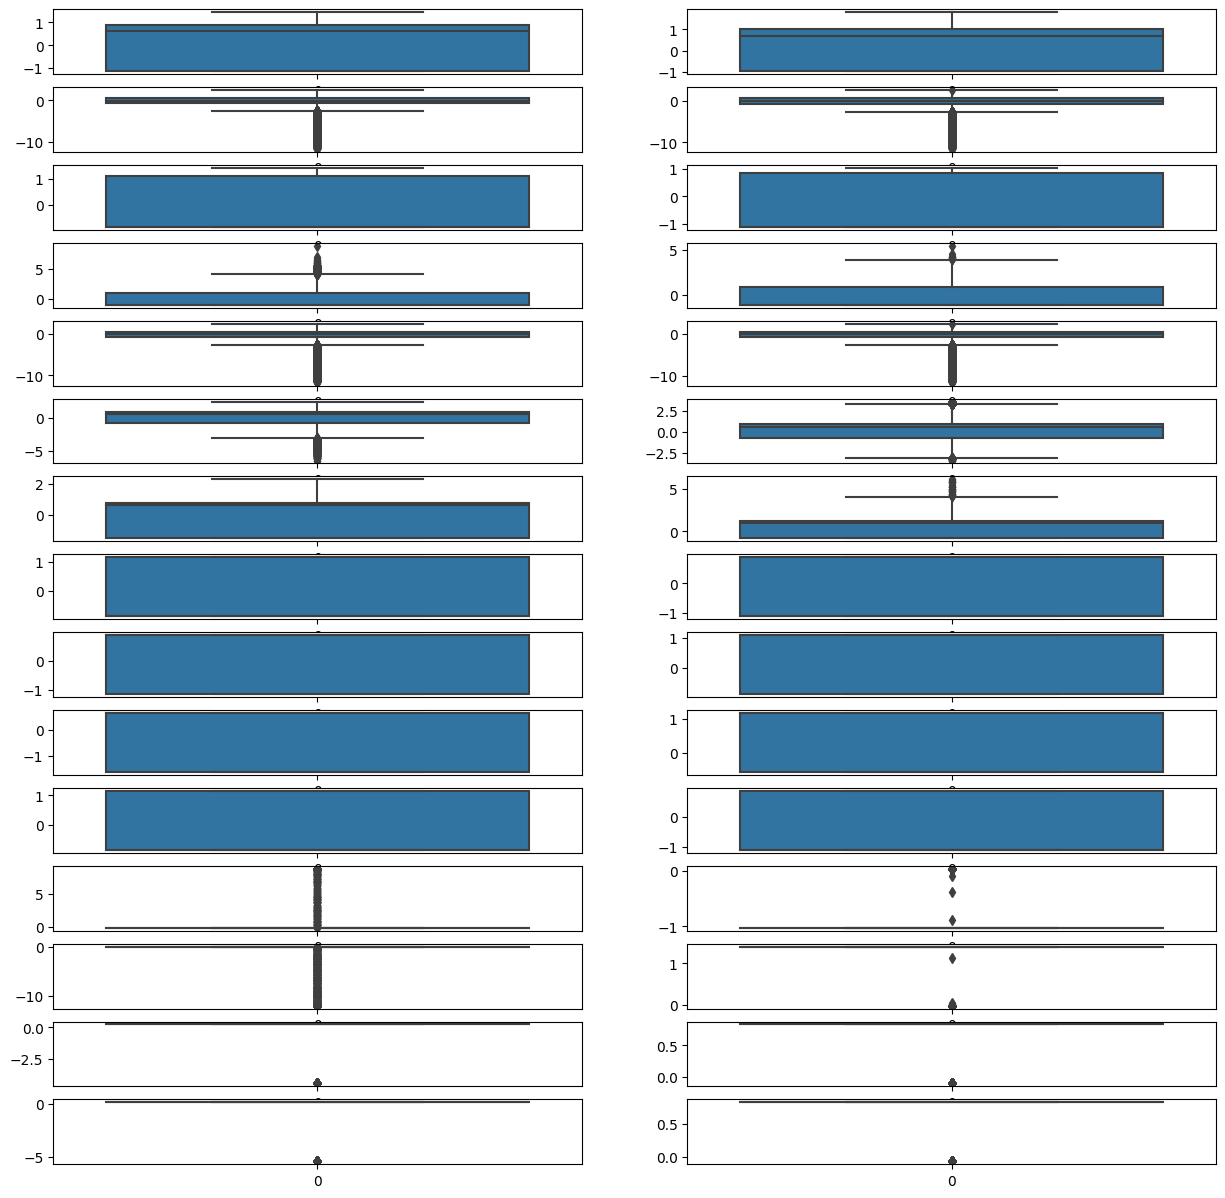

In [56]:
plt.figure(figsize=(15,15))
plt.subplot(15,2,1)
sns.boxplot(x_train[:,0])
plt.subplot(15,2,2)
sns.boxplot(power_transform.fit_transform(x_train[:,0].reshape(-1,1)))
plt.subplot(15,2,3)
sns.boxplot(x_train[:,1])
plt.subplot(15,2,4)
sns.boxplot(power_transform.fit_transform(x_train[:,1].reshape(-1,1)))
plt.subplot(15,2,5)
sns.boxplot(x_train[:,2])
plt.subplot(15,2,6)
sns.boxplot(power_transform.fit_transform(x_train[:,2].reshape(-1,1)))
plt.subplot(15,2,7)
sns.boxplot(x_train[:,3])
plt.subplot(15,2,8)
sns.boxplot(power_transform.fit_transform(x_train[:,3].reshape(-1,1)))
plt.subplot(15,2,9)
sns.boxplot(x_train[:,4])
plt.subplot(15,2,10)
sns.boxplot(power_transform.fit_transform(x_train[:,4].reshape(-1,1)))
plt.subplot(15,2,11)
sns.boxplot(x_train[:,5])
plt.subplot(15,2,12)
sns.boxplot(power_transform.fit_transform(x_train[:,5].reshape(-1,1)))
plt.subplot(15,2,13)
sns.boxplot(x_train[:,6])
plt.subplot(15,2,14)
sns.boxplot(power_transform.fit_transform(x_train[:,6].reshape(-1,1)))
plt.subplot(15,2,15)
sns.boxplot(x_train[:,7])
plt.subplot(15,2,16)
sns.boxplot(power_transform.fit_transform(x_train[:,7].reshape(-1,1)))
plt.subplot(15,2,17)
sns.boxplot(x_train[:,8])
plt.subplot(15,2,18)
sns.boxplot(power_transform.fit_transform(x_train[:,8].reshape(-1,1)))
plt.subplot(15,2,19)
sns.boxplot(x_train[:,9])
plt.subplot(15,2,20)
sns.boxplot(power_transform.fit_transform(x_train[:,9].reshape(-1,1)))
plt.subplot(15,2,21)
sns.boxplot(x_train[:,10])
plt.subplot(15,2,22)
sns.boxplot(power_transform.fit_transform(x_train[:,10].reshape(-1,1)))
plt.subplot(15,2,23)
sns.boxplot(x_train[:,11])
plt.subplot(15,2,24)
sns.boxplot(power_transform.fit_transform(x_train[:,11].reshape(-1,1)))
plt.subplot(15,2,25)
sns.boxplot(x_train[:,12])
plt.subplot(15,2,26)
sns.boxplot(power_transform.fit_transform(x_train[:,12].reshape(-1,1)))
plt.subplot(15,2,27)
sns.boxplot(x_train[:,13])
plt.subplot(15,2,28)
sns.boxplot(power_transform.fit_transform(x_train[:,13].reshape(-1,1)))
plt.subplot(15,2,29)
sns.boxplot(x_train[:,14])
plt.subplot(15,2,30)
sns.boxplot(power_transform.fit_transform(x_train[:,14].reshape(-1,1)))
plt.show()

In [57]:
# so from above we came to conclusion that by applying yeo-johnson transformation on each column outliers are reducing some what 
## so use this transformation to transform your data and reducing outliers
## Another benifit of applying yeo-johnson data comes into the same scale compared with the actual data

In [58]:
power_transformer_pipeline = Pipeline(
steps = [
    ('Trabsformer' , PowerTransformer())
]
)

In [59]:
## Transforming training and testing data using Power Transformer Pipeline

In [60]:
x_train_transformed = power_transformer_pipeline.fit_transform(x_train[:,:])

In [61]:
x_test_transformed = power_transformer_pipeline.transform(x_test[:,:])

###### Performing Exploratory Data Analysis

In [62]:
X_train_rsmote['failure'] = y_train_rsmote

In [63]:
transformed_data = pd.DataFrame()

In [64]:
X_train_rsmote.columns

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'failure'],
      dtype='object')

In [65]:
for i in range(15):
    transformed_data[X_train_rsmote.columns[i]] = x_train_transformed[:,i]

In [66]:
transformed_data['Failure'] = y_train_rsmote

In [67]:
## Using Groupby OPeration on Failure Column to know the differance between the failure and non failure columns 

In [68]:
TP2_info = transformed_data.groupby('Failure')['TP2'].mean()
TP3_info = transformed_data.groupby('Failure')['TP3'].mean()
H1_info = transformed_data.groupby('Failure')['H1'].mean()
DV_pressure_info = transformed_data.groupby('Failure')['DV_pressure'].mean()
Reservoirs_info = transformed_data.groupby('Failure')['Reservoirs'].mean()
Oil_temperature_info = transformed_data.groupby('Failure')['Oil_temperature'].mean()
Motor_current_info = transformed_data.groupby('Failure')['Motor_current'].mean()
COMP_info = transformed_data.groupby('Failure')['COMP'].mean()
DV_eletric_info = transformed_data.groupby('Failure')['DV_eletric'].mean()
Towers_info = transformed_data.groupby('Failure')['Towers'].mean()
MPG_info = transformed_data.groupby('Failure')['MPG'].mean()
LPS_info = transformed_data.groupby('Failure')['LPS'].mean()
Pressure_switch_info = transformed_data.groupby('Failure')['Pressure_switch'].mean()
Oil_level_info = transformed_data.groupby('Failure')['Oil_level'].mean()
Caudal_impulses_info = transformed_data.groupby('Failure')['Caudal_impulses'].mean()

In [69]:
print(TP2_info , TP3_info ,H1_info , DV_pressure_info , Reservoirs_info , Oil_temperature_info,Motor_current_info,COMP_info,DV_eletric_info,
Towers_info,MPG_info,
LPS_info,Pressure_switch_info,Oil_level_info,Caudal_impulses_info)

Failure
0   -0.812432
1    0.812470
Name: TP2, dtype: float64 Failure
0    0.530646
1   -0.530671
Name: TP3, dtype: float64 Failure
0    0.859398
1   -0.859439
Name: H1, dtype: float64 Failure
0   -0.914149
1    0.914192
Name: DV_pressure, dtype: float64 Failure
0    0.530620
1   -0.530645
Name: Reservoirs, dtype: float64 Failure
0   -0.826232
1    0.826271
Name: Oil_temperature, dtype: float64 Failure
0   -0.778306
1    0.778342
Name: Motor_current, dtype: float64 Failure
0    0.857186
1   -0.857227
Name: COMP, dtype: float64 Failure
0   -0.858747
1    0.858787
Name: DV_eletric, dtype: float64 Failure
0    0.469039
1   -0.469061
Name: Towers, dtype: float64 Failure
0    0.85328
1   -0.85332
Name: MPG, dtype: float64 Failure
0   -0.088869
1    0.088874
Name: LPS, dtype: float64 Failure
0   -0.017006
1    0.017006
Name: Pressure_switch, dtype: float64 Failure
0   -0.224755
1    0.224765
Name: Oil_level, dtype: float64 Failure
0   -0.180227
1    0.180236
Name: Caudal_impulses, dtype: flo

In [70]:
## This info_list stores details about the average of each column for failure and non failure data points
info_list = [TP2_info , TP3_info ,H1_info , DV_pressure_info , Reservoirs_info , Oil_temperature_info,Motor_current_info,COMP_info,DV_eletric_info,
Towers_info,MPG_info,LPS_info,Pressure_switch_info,Oil_level_info,Caudal_impulses_info]

In [71]:
## This for loop differentiates between the failure data points and non failure data points
for i in range(15):
    print(f"for non failure points {transformed_data.columns[i]} will be on average {info_list[i][0]} and for failure points  {info_list[i][1]}")
    print()

for non failure points TP2 will be on average -0.8124317675581341 and for failure points  0.8124700084677869

for non failure points TP3 will be on average 0.5306457274855017 and for failure points  -0.5306707048142235

for non failure points H1 will be on average 0.8593982541149237 and for failure points  -0.8594387057224349

for non failure points DV_pressure will be on average -0.9141487558343391 and for failure points  0.9141917845308729

for non failure points Reservoirs will be on average 0.53062027109699 and for failure points  -0.5306452472274873

for non failure points Oil_temperature will be on average -0.8262319834641775 and for failure points  0.826270873945684

for non failure points Motor_current will be on average -0.7783056822560173 and for failure points  0.7783423168614888

for non failure points COMP will be on average 0.8571864584334803 and for failure points  -0.8572268059324591

for non failure points DV_eletric will be on average -0.8587468095538042 and for failu

In [72]:
## for seeing this differences plot the kde plot for both failure and non failure points

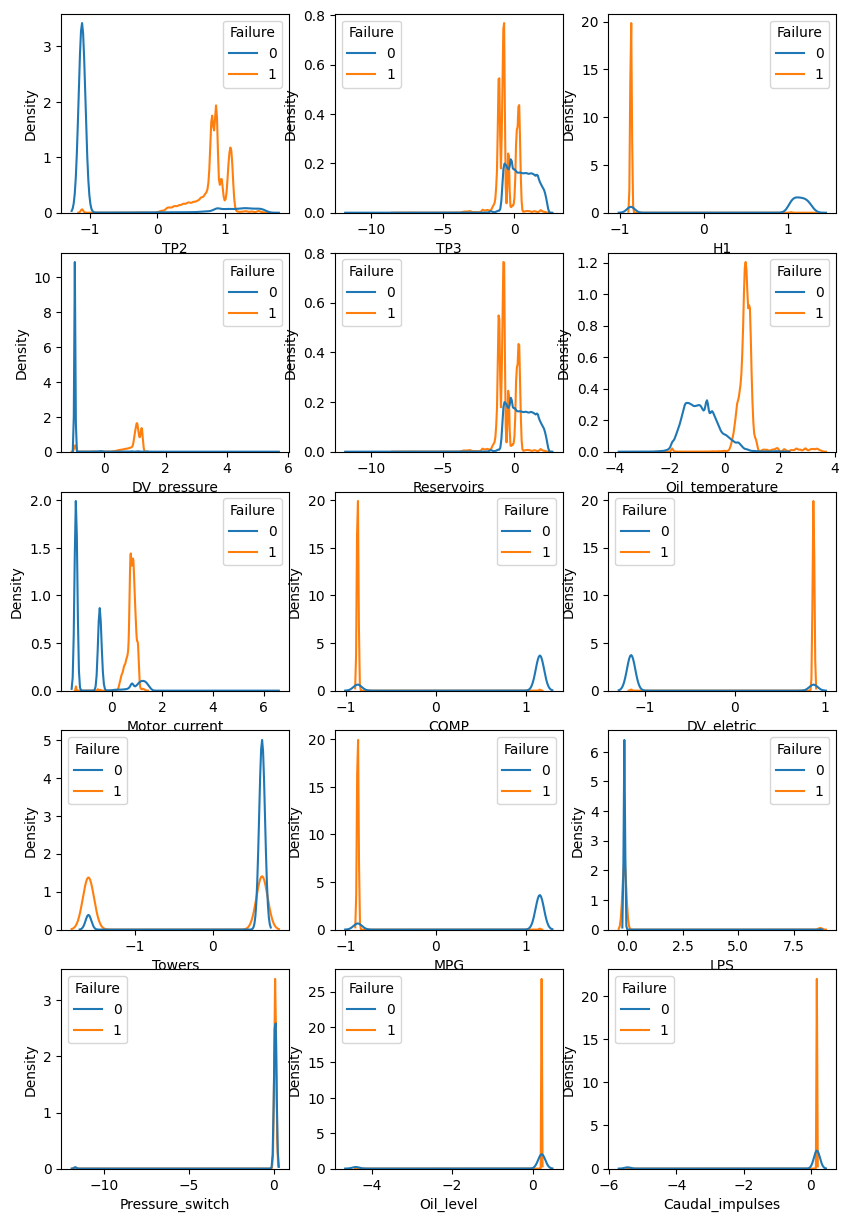

In [73]:
plt.figure(figsize=(10,15))
for i in range(15):
    plt.subplot(5,3,i+1)
    sns.kdeplot(data = transformed_data , x = transformed_data.columns[i] , hue='Failure')
plt.show()

###### from above KDE plots we conclude the following :--

(1) Most of the TP2 values for failure points less than -1 and all the non failure points are greter than 
(2) for TP3 both have approximately same distribution 
(3) for H1 for all the failure points are near -1 but for the non failure points some are at 0 and some are at -1 but maximum points at 0 only
(4)for DV_Pressure non failure points are less than 0 and for failure points its greater than 0 
(5) Distribution of Oil-Temperature values be like -2 to 0 for non failure points and 0-1.5 for failure points 
(6)Distribution of Motor-Current values be like -2 to 0 for non failure points and 0-1.5 for failure points 
(7)COMP , MPG and DV-elctric are completely opposite

###### Building a Machine Learning Model for Classification of a Given data point as Failure Point or Non-Failure Point

In [77]:
## Importing all Models 

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB , BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier , BaggingClassifier , GradientBoostingClassifier , VotingClassifier

In [79]:
## Importing accuracy score
from sklearn.metrics import accuracy_score

In [81]:
models_dictionary = {
    'Logistic' : LogisticRegression() ,
    'Perceptron': Perceptron(),
    'Navie-Bayes': GaussianNB(),
    'Bernoulli-Navie Bayes' : BernoulliNB(),
    'Support-Vector' : SVC(),
    'Decision Tree Clssifier': DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
}

In [ ]:
    'Extra Tree classifier' : ExtraTreeClassifier(),
    'Cat Boost Classifier' : CatBoostClassifier(),
    'XGB Classifier' : XGBClassifier(),
    'Ada Boost Claasifier' : AdaBoostClassifier(),
    'Bagging Classifier' : BaggingClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier()

In [82]:
accuracy_dictionary = dict()

In [ ]:
for i in models_dictionary :
    model = models_dictionary[i]
    model.fit(x_train_transformed , y_train_rsmote)
    y_predict = model.predict(x_test_transformed)
    accuracy_dictionary[i] = accuracy_score(y_predict,y_test)
    
print(accuracy_dictionary)

C:\Users\PAVAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(accuracy_dictionary)